In [ ]:
import pandas as pd
import numpy as np
import time
import random
from itertools import chain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_data = pd.read_csv("/content/drive/MyDrive/data/digitdata/trainingimages",skip_blank_lines=False, header=None,squeeze  = True)
training_labels  = pd.read_csv("/content/drive/MyDrive/data/digitdata/traininglabels",skip_blank_lines=False, header=None)
test_images = pd.read_csv("/content/drive/MyDrive/data/digitdata/testimages",skip_blank_lines=False, header=None,squeeze  = True)
test_labels = pd.read_csv("/content/drive/MyDrive/data/digitdata/testlabels",skip_blank_lines=False, header=None)
validation_images = pd.read_csv("/content/drive/MyDrive/data/digitdata/validationimages",skip_blank_lines=False, header=None,squeeze  = True)
validation_labels = pd.read_csv("/content/drive/MyDrive/data/digitdata/validationlabels",skip_blank_lines=False, header=None)

In [ ]:
print(training_data.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(140000,)
(5000, 1)
(28000,)
(1000, 1)


In [ ]:
print(training_data[0:28], test_images[0:28])

0                                 
1                                 
2                                 
3                                 
4                                 
5                     +++++##+    
6             +++++######+###+    
7            +##########+++++     
8             #######+##          
9             +++###  ++          
10               +#+              
11               +#+              
12                +#+             
13                +##++           
14                 +###++         
15                  ++##++        
16                    +##+        
17                     ###+       
18                  +++###        
19                ++#####+        
20              ++######+         
21            ++######+           
22           +######+             
23        ++######+               
24        +####++                 
25                                
26                                
27                                
Name: 0, dtype: obje

# **Data Transformation**

In [ ]:
def transform_data(data):
    data_temp = data.copy()
    for i in range(data_temp.shape[0]):
      data_temp[i] = data_temp[i].replace(' ', '0').replace('#', '1').replace('+', '1')
    data_temp = data_temp.apply(lambda x: pd.Series(list(x)))
    data_temp = data_temp.apply(pd.to_numeric)
    return data_temp

In [ ]:
train_digit_data= transform_data(training_data)
test_digit_data=transform_data(test_images)

In [ ]:
percent=1

In [ ]:
def colorpixelcount(df):
  count_list=[]
  for i in range(int(df.shape[0]/4)):
    for j in range(int(df.shape[1]/4)):
      count=0
      for k in range((i*4),(i*4)+4):
        for l in range((j*4),(j*4)+4):
          if df[k][l]==1:
            count=count+1
      count_list.append(count)
  return count_list

In [ ]:
num_samples  =  training_labels.shape[0]
data_random_samples = random.sample(range(num_samples), int(percent * num_samples))
data_sample_range = [ range(i * 28, (i+1)*28)  for i in data_random_samples]
data_sample_range = list(chain(*data_sample_range))
                        
train_digit_data = train_digit_data.iloc[data_sample_range]
training_labels = (np.asarray(training_labels)[data_random_samples])



ts=time.time()

labels=[0,1,2,3,4,5,6,7,8,9]
feat_list=[]
for label in labels:
  re=0
  feat_temp_list=[]
  while re<(int(5000*percent)):
    if training_labels[re][0]==label:
      temp=colorpixelcount(train_digit_data[(28*re):(28*(re+1))].reset_index(drop=True))
      feat_temp_list.append(temp)
    re=re+1
  feat_list.append(feat_temp_list)

feat_array=np.array(feat_list)

feature_list=[]
for lab in range(10):
  featu_list=[]
  for k in range(49):
    sum_list=[]
    for j in range(17):
      c=0
      for i in range(len(feat_array[lab])):
        if feat_array[lab][i][k]==j:
          c=c+1
      sum_list.append(c)
    featu_list.append(sum_list)
  feature_list.append(featu_list)

feature_array=np.array(feature_list)


prob_list=[]

for l in range(10):
  prob_array=feature_array[l]/len(feat_array[l])
  for i in range(len(prob_array)):
    for j in range(len(prob_array[i])):
      if prob_array[i][j]==0:
        prob_array[i][j]=0.001
  prob_list.append(prob_array)

train_prob_array=np.array(prob_list)

y_list=[]
for l in range(10):
  y_list.append(len(feat_array[l]))
y_array=np.array(y_list)

prob_y_array=y_array/(5000*percent)


te=time.time()
t=te-ts

print(t)

30.40693163871765


In [ ]:
def classify_nb(df):
  test_list=colorpixelcount(df)
  p_list=[]
  for j in range(len(prob_y_array)):
    prob=1
    for i in range(len(test_list)):
      prob=prob*train_prob_array[j][i][test_list[i]]
    p_list.append(prob_y_array[j]*prob)
  return p_list.index(max(p_list))

In [ ]:
test_results=[]
for i in range(len(test_labels)):
  res=classify_nb(test_digit_data[(28*i):(28*(i+1))].reset_index(drop=True))
  test_results.append(res)

In [ ]:
def accuracy(result_list):
  s_count=0
  for i in range(len(result_list)):
    if result_list[i]==test_labels[0][i]:
      s_count=s_count+1
  acc=((s_count/len(result_list))*100)
  return acc

In [ ]:
accuracy(test_results)

75.5

In [ ]:
stats= pd.read_excel("/content/drive/MyDrive/data/Naive_bayes_digit_stats.xlsx")
stats=stats.drop([1, 2, 3], axis=1)

In [ ]:
stats

,Percentage,Mean,Stddev,tt
0,0.1,63.400000,2.206808,2.99
1,0.2,69.633333,1.650253,5.90
2,0.3,71.300000,1.014889,8.86
3,0.4,72.896667,0.300056,12.10
4,0.5,74.633333,1.266228,15.05
5,0.6,74.533333,0.230940,17.09
6,0.7,75.100000,1.135782,20.61
7,0.8,75.200000,0.360555,24.54
8,0.9,74.600000,0.100000,26.63
9,1.0,75.500000,0.000000,29.02


In [ ]:
import matplotlib.pyplot as plt

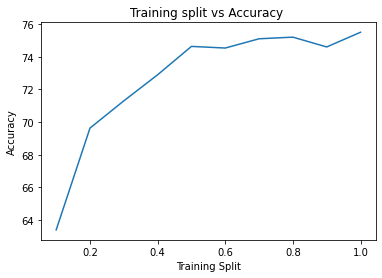

In [ ]:
plt.plot(stats.Percentage, stats.Mean )
plt.title("Training split vs Accuracy ")
plt.xlabel("Training Split")
plt.ylabel("Accuracy")
plt.show()

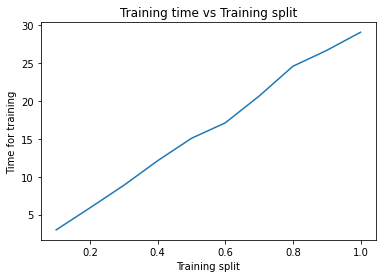

In [ ]:
plt.plot(stats.Percentage,stats.tt )
plt.title("Training time vs Training split")
plt.xlabel("Training split")
plt.ylabel("Time for training")
plt.show()